<a href="https://colab.research.google.com/github/HongJeongHwan/MachineLearning/blob/main/%EC%8B%A4%EC%8A%B503%EB%8B%B9%EB%87%A8%EB%B3%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 당뇨병 여부 분류

##§ 데이터 불러오기

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터프레임 생성
file_path ='/content/drive/MyDrive/KDT/04. 머신러닝/02. Data파일/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
df_diabetes = pd.read_csv(file_path)
#결과 확인
print(df_diabetes)

NameError: ignored

In [ ]:
# 기본정보 확인
df_diabetes.info()
# 누락 데이터가 없으므로 다음 진행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

##§ 데이터 전처리 : 패스

##§ EDA(탐색적 데이터 분석)

In [ ]:
# 컬럼이름 추출
names = df_diabetes.columns
print(f'컬럼이름 확인 : \n{names}')

컬럼이름 확인 : 
Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


###■ 정답 레이블 분포 분석

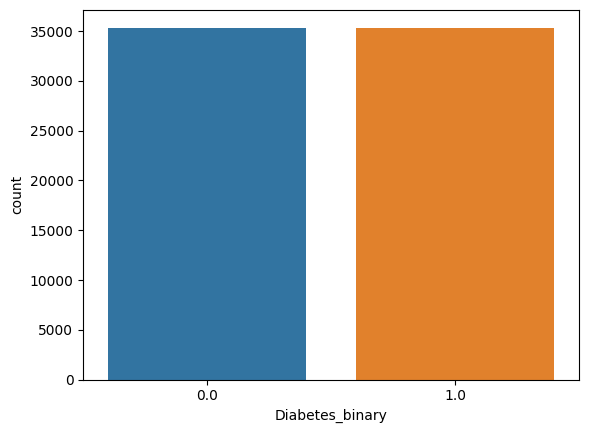

0.0    0.5
1.0    0.5
Name: Diabetes_binary, dtype: float64

In [ ]:
# 정답 레이블 --> 범주형(명목형) --> 분포(빈도수) 확인
# 시각화
sns.countplot(data=df_diabetes,x=names[0])
plt.show()

# 통계량 추출 --> 비율 추출
df_diabetes.Diabetes_binary.value_counts(normalize=True)


###■ 당뇨병과 고혈압의 관계 분석

1.0    0.563458
0.0    0.436542
Name: HighBP, dtype: float64


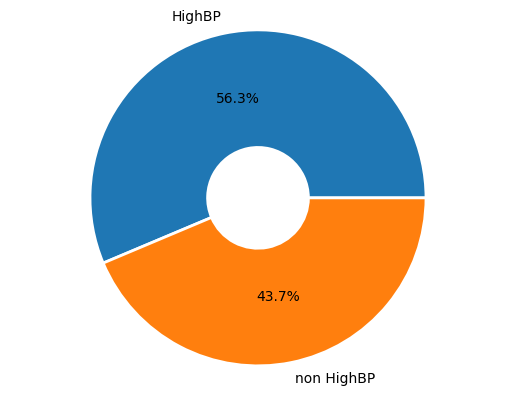

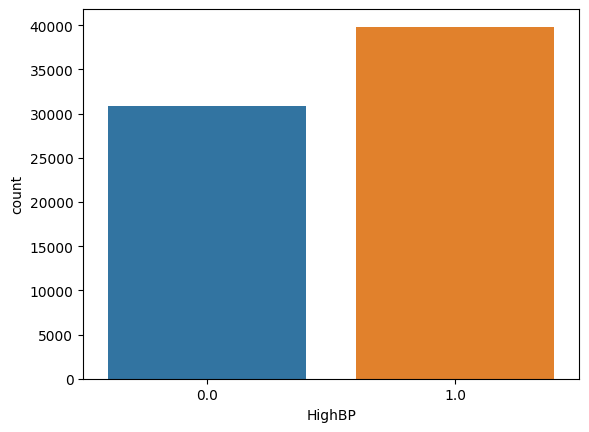

In [ ]:
# 고혈압 여부 시각화

# pie chart 생성
# 데이터 생성
data_ = df_diabetes.loc[:,names[1]].value_counts(normalize=True)
print(data_)
labels_ = ['HighBP','non HighBP']
wedgeprops_ = {'width':0.7,'edgecolor':'w','linewidth':2}

# 그래프 생성 및 출력
plt.pie(x=data_,labels=labels_,autopct='%.1f%%',wedgeprops=wedgeprops_)
plt.axis('equal')
plt.show()

# 막대그래프 생성
sns.countplot(df_diabetes,x=names[1])
plt.show()

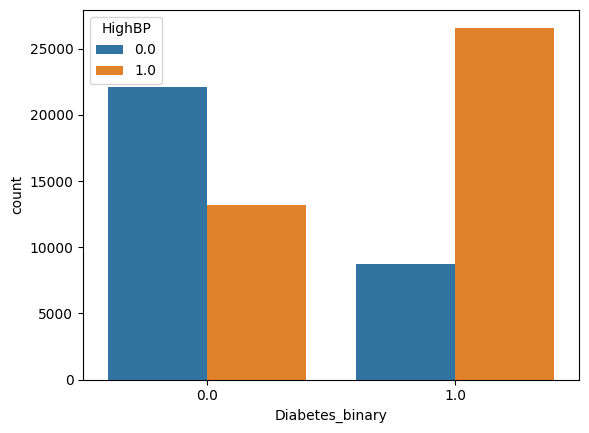

In [ ]:
# 당뇨병과 고혈압의 관계 확인(1)
sns.countplot(data=df_diabetes,x=names[0],hue=names[1])
plt.show()

In [ ]:
# 통계분석

# 당뇨병에 대해서 정상인 사람 중 고혈압이 아닌 사람과 고혈압인 사람의 빈도수 추출
cond = df_diabetes.loc[:,names[0]]==0.0  # 당뇨 정상인
normal_hbp_counts = df_diabetes.loc[cond,names[1]].value_counts()
print(f'정상인 사람중 고혈압이 아닌 사람과 고혈압인 사람의 빈도수 :\n{normal_hbp_counts}\n')

# 당뇨병 환자중 고혈압이 아닌 사람과 고혈압인 사람의 비율(빈도수) 추출
diabetes_hbp_counts = df_diabetes.loc[~cond,names[1]].value_counts()
print(f'당뇨병인 사람중 고혈압이 아닌 사람과 고혈압인 사람의 빈도수 :\n{diabetes_hbp_counts}\n')

정상인 사람중 고혈압이 아닌 사람과 고혈압인 사람의 빈도수 :
0.0    22118
1.0    13228
Name: HighBP, dtype: int64

당뇨병인 사람중 고혈압이 아닌 사람과 고혈압인 사람의 빈도수 :
1.0    26604
0.0     8742
Name: HighBP, dtype: int64



###■ 당뇨병과 고지혈의 관계 분석

1.0    0.525703
0.0    0.474297
Name: HighChol, dtype: float64


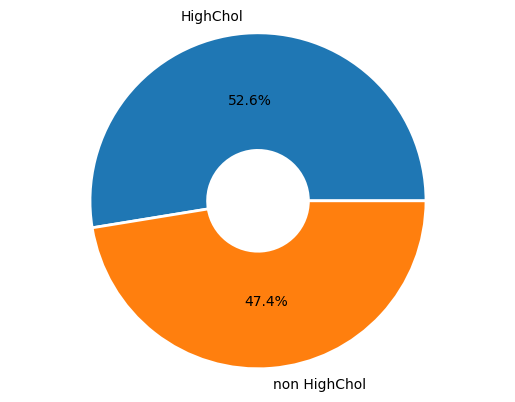

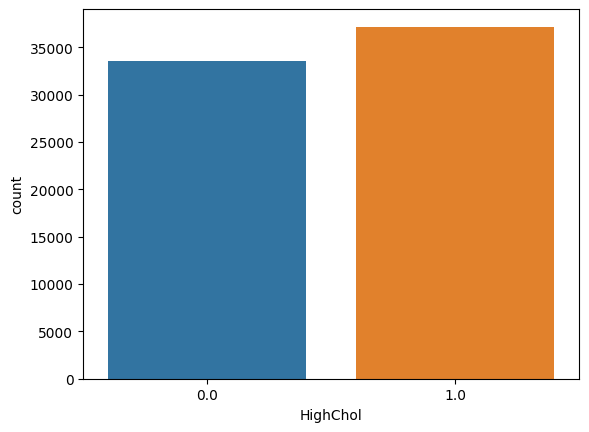

In [ ]:
# 고지혈 여부 시각화

# pie chart 생성
# 데이터 생성
data_ = df_diabetes.loc[:,names[2]].value_counts(normalize=True)
print(data_)
labels_ = ['HighChol','non HighChol']
wedgeprops_ = {'width':0.7,'edgecolor':'w','linewidth':2}

# 그래프 생성 및 출력
plt.pie(x=data_,labels=labels_,autopct='%.1f%%',wedgeprops=wedgeprops_)
plt.axis('equal')
plt.show()

# 막대그래프 생성
sns.countplot(df_diabetes,x=names[2])
plt.show()

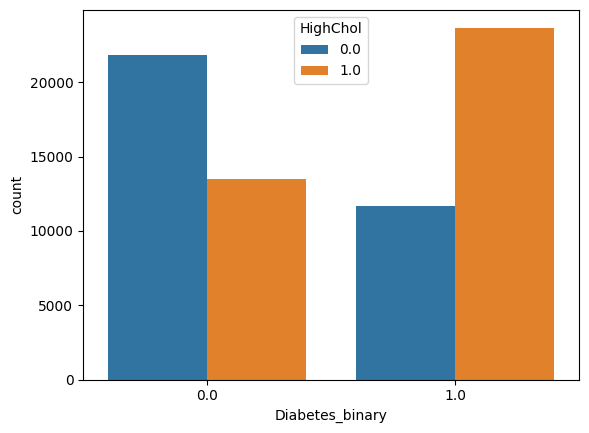

In [ ]:
# 당뇨병과 고지혈증의 관계 확인(1)
sns.countplot(data=df_diabetes,x=names[0],hue=names[2])
plt.show()

In [ ]:
# 통계분석

# 당뇨병에 대해서 정상인 사람 중 고지혈증이 아닌 사람과 고지혈증인 사람의 빈도수 추출
cond = df_diabetes.loc[:,names[0]]==0.0  # 당뇨 정상인
normal_hchol_counts = df_diabetes.loc[cond,names[2]].value_counts()
print(f'정상인 사람중 고지혈증이 아닌 사람과 고지혈증인 사람의 빈도수 :\n{normal_hchol_counts}\n')

# 당뇨병 환자중 고지혈증이 아닌 사람과 고지혈증인 사람의 비율 추출
diabetes_hchol_ratio = df_diabetes.loc[~cond,names[2]].value_counts(normalize=True)
print(f'당뇨병인 사람중 고지혈증이 아닌 사람과 고지혈증인 사람의 비율 :\n{diabetes_hchol_ratio}\n')

정상인 사람중 고지혈증이 아닌 사람과 고지혈증인 사람의 빈도수 :
0.0    21869
1.0    13477
Name: HighChol, dtype: int64

당뇨병인 사람중 고지혈증이 아닌 사람과 고지혈증인 사람의 비율 :
1.0    0.670118
0.0    0.329882
Name: HighChol, dtype: float64



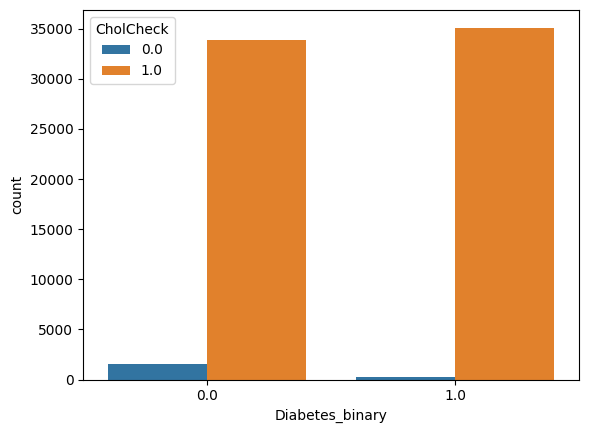

In [ ]:
# 당뇨병과 고지혈증검사와의 관계 확인(1)
sns.countplot(data=df_diabetes,x=names[0],hue=names[3])
plt.show()

###■ 당뇨병과 고지혈증검사와의 관계 분석

고지혈증 검사유무 빈도수 확인 :
0.0    0.024741
1.0    0.975259
Name: CholCheck, dtype: float64



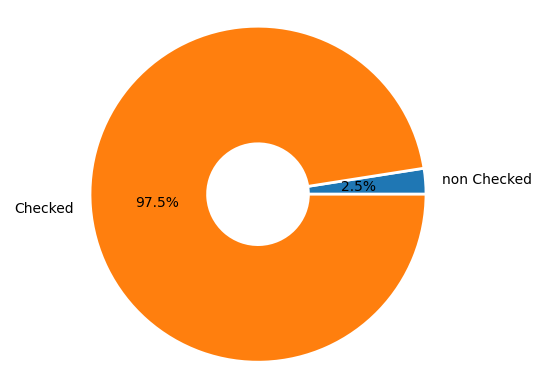

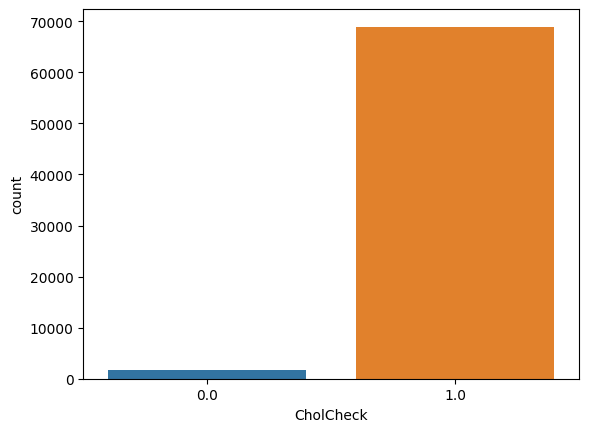

In [ ]:
# 고지혈증 검사여부 시각화

# pie chart 생성
# 데이터 생성
data_ = df_diabetes.loc[:,names[3]].value_counts(normalize=True,ascending=True)
print(f'고지혈증 검사유무 빈도수 확인 :\n{data_}\n')
labels_ = ['non Checked','Checked']
wedgeprops_ = {'width':0.7,'edgecolor':'w','linewidth':2}

# 그래프 생성 및 출력
plt.pie(x=data_,labels=labels_,autopct='%.1f%%',wedgeprops=wedgeprops_)
plt.axis('equal')
plt.show()

# 막대그래프 생성
sns.countplot(df_diabetes,x=names[3])
plt.show()

###■ 당뇨병과 BMI(비만)의 관계 분석

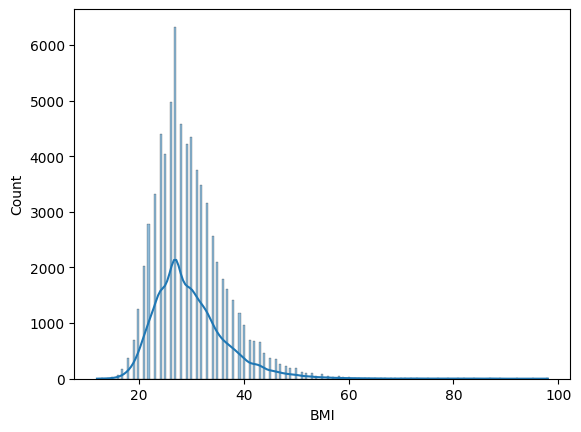

In [ ]:
# BMI 분포 시각화
'''
# 대한비만학회
BMI 23-24.9 kg/m2 :비만 전 단계(과체중 or 위험체중)
BMI 25-29.9 kg/m2 :1단계비만
BMI 30-34.9 kg/m2 :2단계비만
BMI ≥ 35 kg/m2 :3단계비만(고도비만)

# 미국 기준
BMI 18.5~24.9 : 정상
BMI 25~29 : 과체중
BMI30 이상 : 비만
'''
# histplot 생성(연속적인 수치)
sns.histplot(df_diabetes,x=names[4],kde=True)
plt.show()

In [ ]:
# BMI 요약 통계량 확인
df_diabetes.loc[:,names[4]].describe()

count    70692.000000
mean        29.856985
std          7.113954
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64

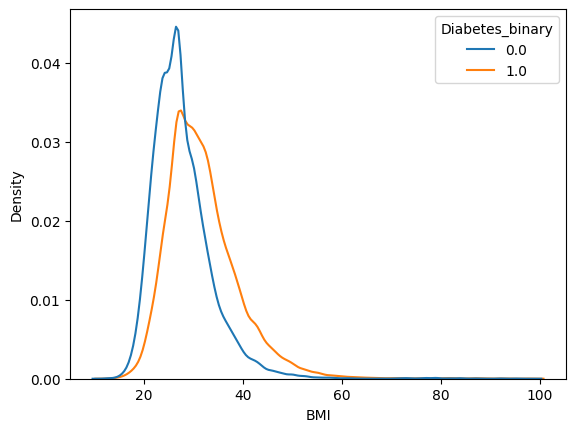

In [ ]:
# 당뇨병과 BMI 관계 확인(1)
sns.kdeplot(data=df_diabetes,x=names[4],hue=names[0])
plt.show()

In [ ]:
# 통계분석
# 비만인 사람중 당뇨병에 대해서 정상인 사람과 당뇨병인 사람의 수 추출
cond = df_diabetes.loc[:,names[4]]>=30.0  # 비만
num = df_diabetes.loc[cond,names[0]].value_counts()
print(f'비만(BMI>=30)인 사람중 당뇨병인 사람과 정상인 사람의 빈도수 :\n{num}\n')

# 비만이 아닌 사람중 당뇨병에 대해서 정상인 사람과 당뇨병인 사람의 수 추출
num = df_diabetes.loc[~cond,names[0]].value_counts()
print(f'정상(BMI<30)인 사람중 당뇨병인 사람과 정상인 사람의 빈도수 :\n{num}\n')

# # 당뇨병에 대해서 정상인 사람 중 비만인 아닌 사람(BMI>=30)과 정상인 사람(BMI<30)의 빈도수 추출
# cond11 = df_diabetes.loc[:,names[0]]==0.0  # 당뇨 정상인
# cond12 = df_diabetes.loc[:,names[4]]>=30.0  # 비만
# cond1 = cond11 & cond12
# normal_hchol_counts = df_diabetes.loc[cond1,names[0]].value_counts()
# print(f'정상인 사람중 비만인 아닌 사람(BMI>=30)과 정상인 사람(BMI<30)의 빈도수 :\n{normal_hchol_counts}\n')

# # 당뇨병 환자중 비만인 아닌 사람(BMI>=30)과 정상인 사람(BMI<30)의 비율 추출
# cond21 = df_diabetes.loc[:,names[0]]==1.0  # 당뇨 정상인
# cond22 = df_diabetes.loc[:,names[4]]<30.0  # 비만이 아닌 사람
# cond2 = cond21 & cond22
# diabetes_hchol_ratio = df_diabetes.loc[cond2,names[0]].value_counts()
# print(f'당뇨병인 사람중 비만인 아닌 사람(BMI>=30)과 정상인 사람(BMI<30)의 비율 :\n{diabetes_hchol_ratio}\n')

비만(BMI>=30)인 사람중 당뇨병인 사람과 정상인 사람의 빈도수 :
1.0    20557
0.0    10887
Name: Diabetes_binary, dtype: int64

정상(BMI<30)인 사람중 당뇨병인 사람과 정상인 사람의 빈도수 :
0.0    24459
1.0    14789
Name: Diabetes_binary, dtype: int64



###■ 당뇨병과 흡연의 관계 분석

흡연유무 빈도수 확인 :
1.0    33598
0.0    37094
Name: Smoker, dtype: int64



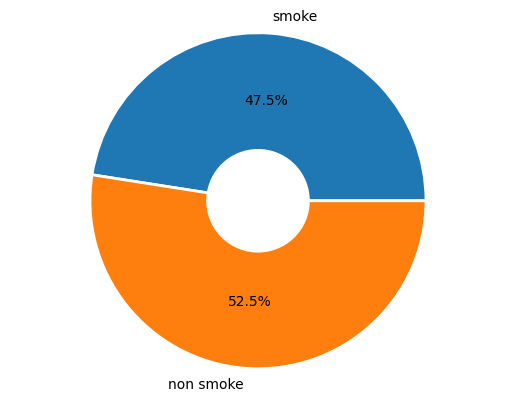

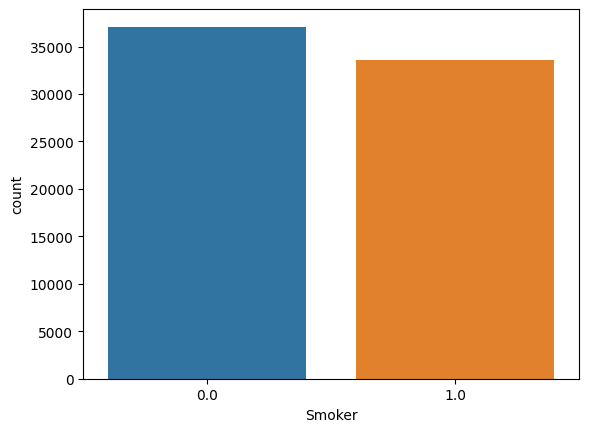

In [ ]:
# 흡연 여부 시각화

# pie chart 생성
# 데이터 생성
data_ = df_diabetes.loc[:,names[5]].value_counts(ascending=True)
print(f'흡연유무 빈도수 확인 :\n{data_}\n')
labels_ = ['smoke','non smoke']
wedgeprops_ = {'width':0.7,'edgecolor':'w','linewidth':2}

# 그래프 생성 및 출력
plt.pie(x=data_,labels=labels_,autopct='%.1f%%',wedgeprops=wedgeprops_)
plt.axis('equal')
plt.show()

# 막대그래프 생성
sns.countplot(df_diabetes,x=names[5])
plt.show()

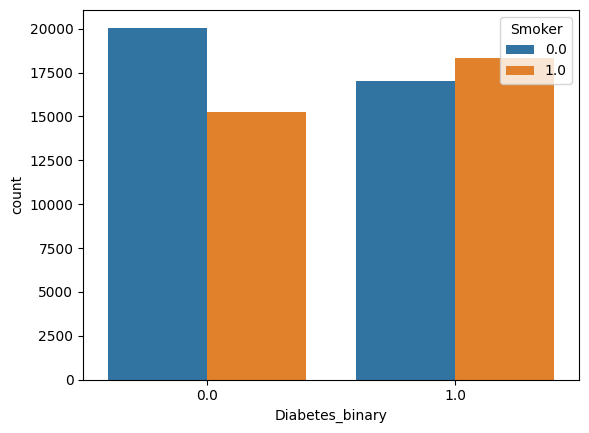

In [ ]:
# 당뇨병과 흡연의 관계 확인(1) : 당뇨병인 사람과 비당뇨병인 사람은 동수
sns.countplot(df_diabetes,x=names[0],hue=names[5])
plt.show()

In [ ]:
# # 당뇨병과 흡연의 관계 확인(2)
# sns.countplot(df_diabetes,x=names[5],hue=names[0])
# plt.show()

In [ ]:
# 통계분석
# 당뇨병에 대해서 정상인 사람의 흡연인/비흡연인의 수 추출
cond = df_diabetes.loc[:,names[0]]==0  # 당뇨가 없는 사람
num = df_diabetes.loc[cond,names[5]].value_counts()
print(f'당뇨병에 대해서 정상인 사람의 흡연인/비흡연인의 수 :\n{num}\n')

# 당뇨병인 사람의 흡연인/비흡연인 사람의 수 추출
num = df_diabetes.loc[~cond,names[5]].value_counts()
print(f'당뇨병인 사람의 흡연인/비흡연인의수 :\n{num}\n')

당뇨병에 대해서 정상인 사람의 흡연인/비흡연인의 수 :
0.0    20065
1.0    15281
Name: Smoker, dtype: int64

당뇨병인 사람의 흡연인/비흡연인의수 :
1.0    18317
0.0    17029
Name: Smoker, dtype: int64



###■ 당뇨병과 뇌졸증의 관계 분석

뇌졸증 빈도수 확인 :
1.0     4395
0.0    66297
Name: Stroke, dtype: int64



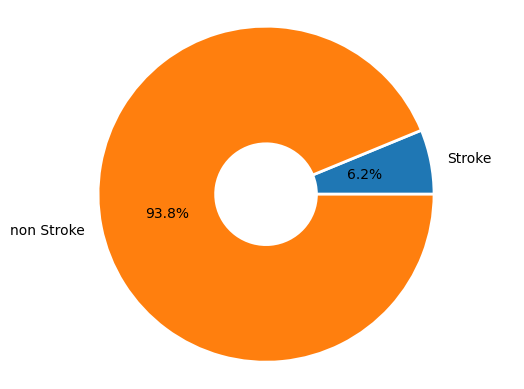

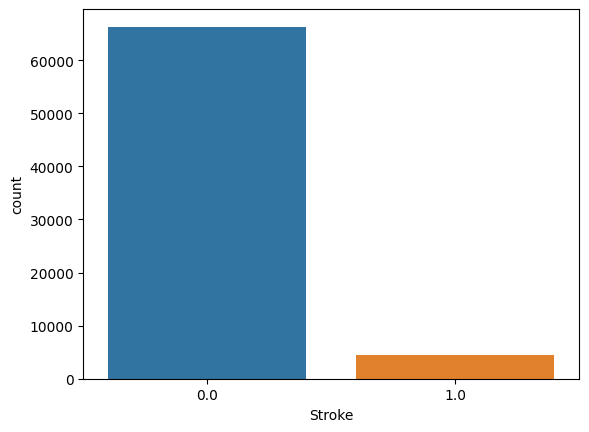

In [ ]:
# 뇌졸증 시각화

# pie chart 생성
# 데이터 생성
data_ = df_diabetes.loc[:,names[6]].value_counts(ascending=True)
print(f'뇌졸증 빈도수 확인 :\n{data_}\n')
labels_ = ['Stroke','non Stroke']
wedgeprops_ = {'width':0.7,'edgecolor':'w','linewidth':2}

# 그래프 생성 및 출력
plt.pie(x=data_,labels=labels_,autopct='%.1f%%',wedgeprops=wedgeprops_)
plt.axis('equal')
plt.show()

# 막대그래프 생성
sns.countplot(df_diabetes,x=names[6])
plt.show()

In [ ]:
# 통계분석
# 당뇨병에 대해서 정상인 사람의 뇌졸중여부의 수 추출
cond = df_diabetes.loc[:,names[0]]==0  # 당뇨가 없는 사람
num = df_diabetes.loc[cond,names[6]].value_counts()
print(f'당뇨병에 대해서 정상인 사람의 뇌졸중여부의 수 :\n{num}\n')

# 당뇨병인 사람의 뇌졸중여부의 수 추출
num = df_diabetes.loc[~cond,names[6]].value_counts()
print(f'당뇨병인 사람의 뇌졸중여부의수 :\n{num}\n')

당뇨병에 대해서 정상인 사람의 뇌졸중여부의 수 :
0.0    34219
1.0     1127
Name: Stroke, dtype: int64

당뇨병인 사람의 뇌졸중여부의수 :
0.0    32078
1.0     3268
Name: Stroke, dtype: int64



###■ 당뇨병과 DiffWalk의 관계 분석

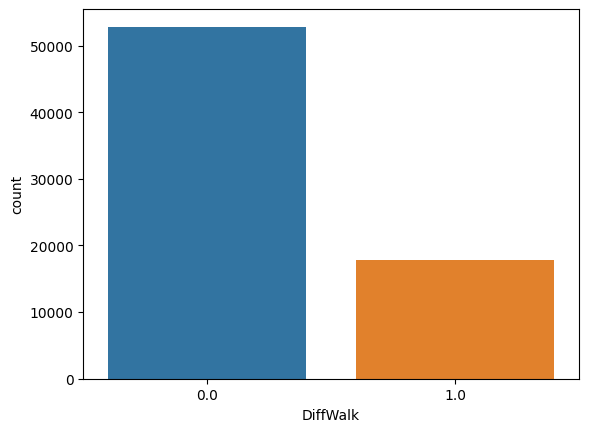

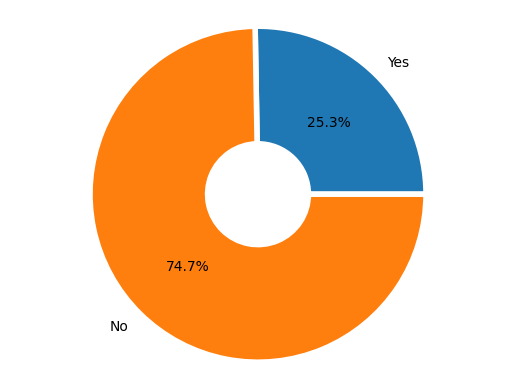

In [ ]:
# 질문 : 당신은 걷거나 계단을 오르는 데 심각한 어려움이 있나요?

# DiffWalk 컬럼의 분포 시각화

# 막대 그래프
sns.countplot(data=df_diabetes, x=names[17])
plt.show()

# pie chart
data_ = df_diabetes.loc[:,names[17]].value_counts(ascending=True)
# print(data_)
labels_ = ['Yes','No']
wedgeprops_ = {'width':0.7,'edgecolor':'w','linewidth':4}
plt.pie(x=data_, labels=labels_, autopct='%.1f%%',wedgeprops=wedgeprops_)
plt.axis('equal')
plt.show()

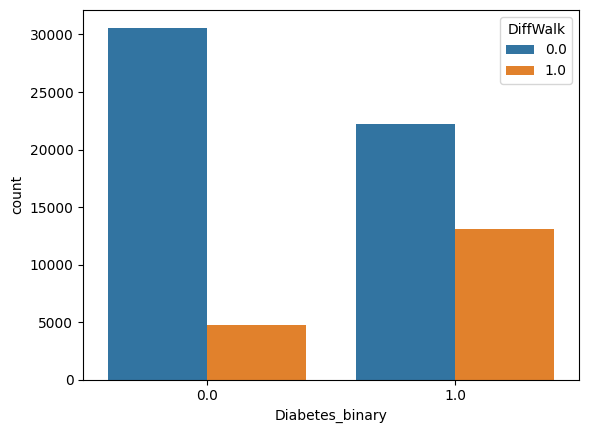

In [ ]:
# 당뇨병과 DiffWalk 컬럼의 관계 확인
sns.countplot(data=df_diabetes,x=names[0],hue=names[17])
plt.show()

In [ ]:
# 통계분석
# 당뇨병에 대해서 정상 --> DiffWalk 컬럼의 빈도수 추출
cond = df_diabetes.loc[:,names[0]]==0
print(f'당뇨병에 대해서 정상인 사람중 DiffWalk 컬럼의 빈도수 :\n{df_diabetes.loc[cond,names[-5]].value_counts()}')
# 당뇨병에 대해서 비정상 --> DiffWalk 컬럼의 빈도수 추출
print(f'당뇨병이 있는 사람중 DiffWalk 컬럼의 빈도수 :\n{df_diabetes.loc[~cond,names[17]].value_counts()}')


당뇨병에 대해서 정상인 사람중 DiffWalk 컬럼의 빈도수 :
0.0    30601
1.0     4745
Name: DiffWalk, dtype: int64
당뇨병이 있는 사람중 DiffWalk 컬럼의 빈도수 :
0.0    22225
1.0    13121
Name: DiffWalk, dtype: int64


###■ 당뇨병과 성별의 관계 분석

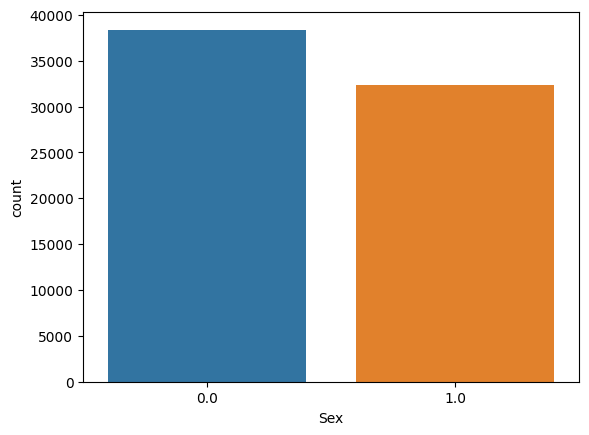

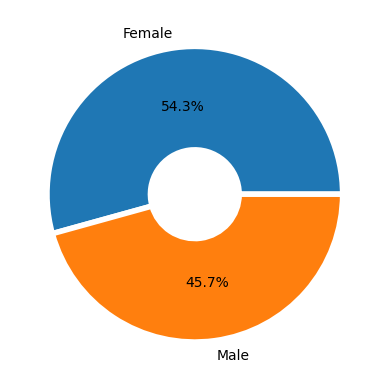

In [ ]:
# 성별 컬럼 시각화

# 막대 그래프
sns.countplot(data=df_diabetes,x=names[18])
plt.show()

# pie chart
data_ = df_diabetes.loc[:,names[18]].value_counts()
# print(data_)
labels_ = ['Female','Male']
# colors_ =
wedgeprops_ = {'width':0.7,'edgecolor':'w','linewidth':4}
plt.pie(x=data_,labels=labels_,autopct='%.1f%%',wedgeprops=wedgeprops_)
plt.show()

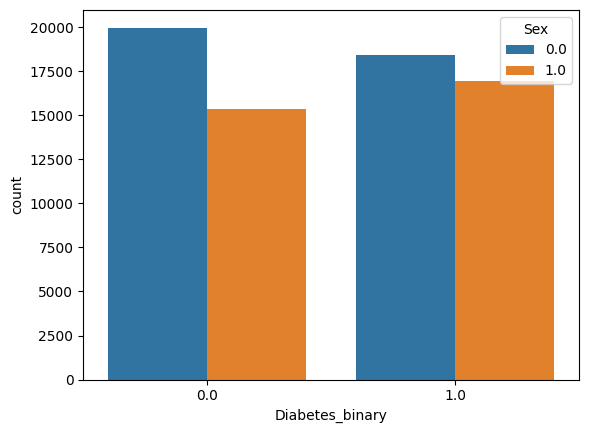

In [ ]:
# 당뇨병과 성별의 관계 확인
sns.countplot(data=df_diabetes,x=names[0],hue=names[18])
plt.show()

In [ ]:
# 통계수치 확인
# cond = df_diabetes.loc[:]

###■ 당뇨병과 나이의 관계 분석

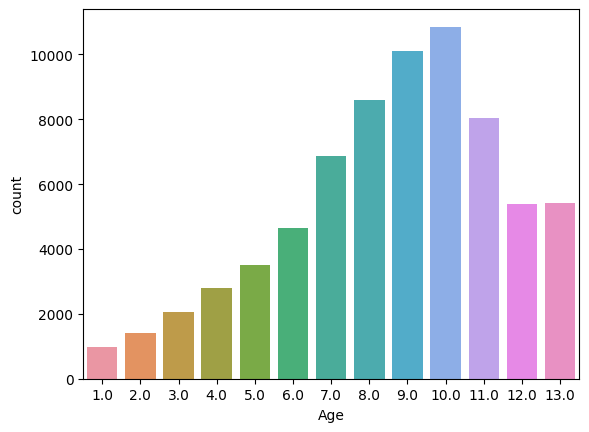

나이 컬럼의 단계별 인구수 :
1.0       979
2.0      1396
3.0      2049
4.0      2793
5.0      3520
6.0      4648
7.0      6872
8.0      8603
9.0     10112
10.0    10856
11.0     8044
12.0     5394
13.0     5426
Name: Age, dtype: int64



In [ ]:
# 나이 컬럼의 분포 시각화
'''
### 나이 컬럼 : 1 - 13단계 범주화
# 1단계 : 18 - 24
# 2단계 : 25 - 29
# 3단계 : 30 - 34
# 4단계 : 35 - 39
# 5단계 : 40 - 44
# 6단계 : 45 - 49
# 7단계 : 50 - 54
# 8단계 : 55 - 59
# 9단계 : 60 - 64
# 10단계 : 65 - 69
# 11단계 : 70 - 74
# 12단계 : 75 - 79
# 13단계 : 80 or older
'''
sns.countplot(data=df_diabetes,x=names[19])
plt.show()

# 나이컬럼의 단계별 인구수 추출
'''
Series자료형의 경우 sort_index(), sort_value() 사용 가능
'''
age_counts = df_diabetes.loc[:,names[19]].value_counts().sort_index()
print(f'나이 컬럼의 단계별 인구수 :\n{age_counts}\n')

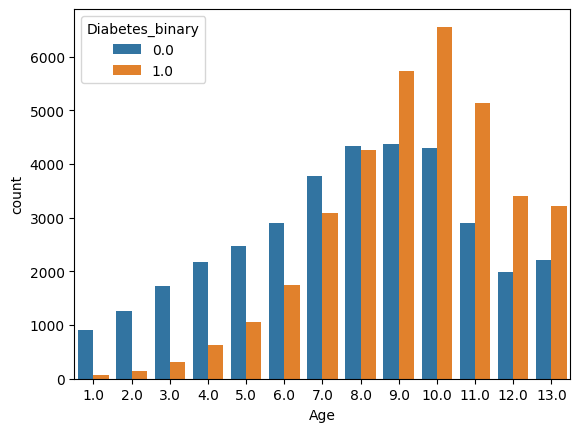

In [ ]:
# 당뇨병과 나이 컬럼의 관계
# sns.countplot(data=df_diabetes,x=names[0],hue=names[-3]) # hue의 항목이 너무 많으면 보기힘이 든다.
# plt.show()

sns.countplot(data=df_diabetes,x=names[-3],hue=names[0])
plt.show()

당뇨병 환자 중 연령 단계별 인구수:
1.0       78
2.0      140
3.0      314
4.0      626
5.0     1051
6.0     1742
7.0     3088
8.0     4263
9.0     5733
10.0    6558
11.0    5141
12.0    3403
13.0    3209
Name: Age, dtype: int64

연령 단계별 인구수 대비 당뇨병 환자 유병률 : 
1.0     0.079673
2.0     0.100287
3.0     0.153245
4.0     0.224132
5.0     0.298580
6.0     0.374785
7.0     0.449360
8.0     0.495525
9.0     0.566950
10.0    0.604090
11.0    0.639110
12.0    0.630886
13.0    0.591412
Name: Age, dtype: float64



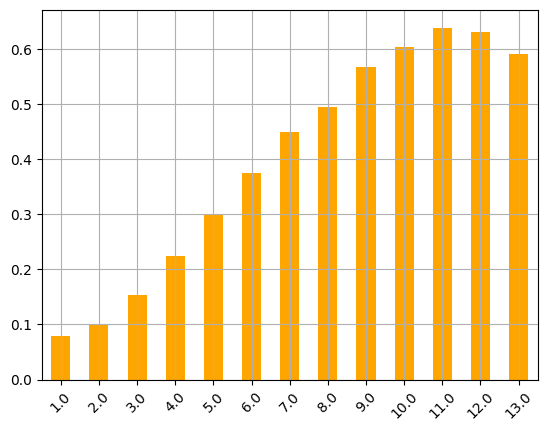

In [ ]:
# 통계분석 --> 연령의 단계별 당뇨병 유병률 계산 --> 시각화

# 당뇨병 환자의 연령 단계별 인구수
cond = df_diabetes.loc[:,names[0]]==1
diabetes_age_counts = df_diabetes.loc[cond,names[19]].value_counts().sort_index()
print(f'당뇨병 환자 중 연령 단계별 인구수:\n{diabetes_age_counts}\n')

# 연령 단계별 인구수 대비 당뇨병 환자 비율(유병률)
ratio = diabetes_age_counts / age_counts
print(f'연령 단계별 인구수 대비 당뇨병 환자 유병률 : \n{ratio}\n')

# 유병률에 대한 시각화 --> Series 자료형 시각화
ratio.plot(kind='bar',grid=True,rot=45,color='orange')
plt.show()


###■ 당뇨병과 교육수준의 관계 분석


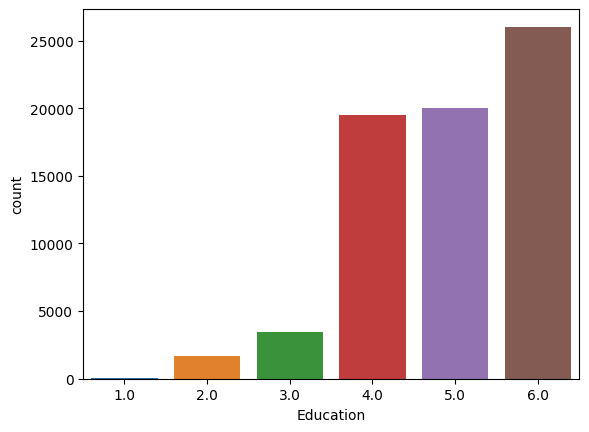

교육수준 단계별 인구수 :
1.0       75
2.0     1647
3.0     3447
4.0    19473
5.0    20030
6.0    26020
Name: Education, dtype: int64



In [ ]:
sns.countplot(data=df_diabetes,x=names[-2])
plt.show()

# 통계추출 --> 교육수준 단계별 인구수 추출
edu_counts = df_diabetes.loc[:,names[-2]].value_counts().sort_index()
print(f'교육수준 단계별 인구수 :\n{edu_counts}\n')

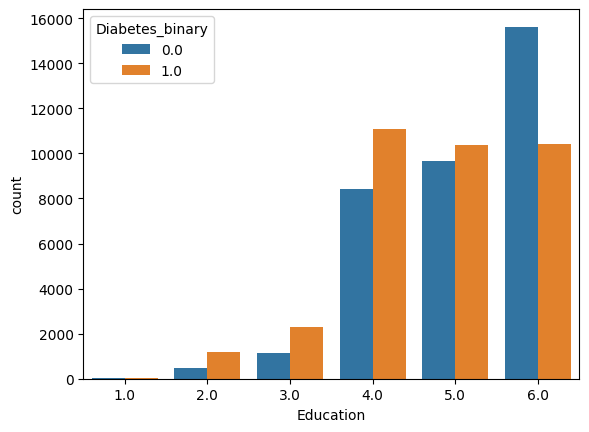

In [ ]:
# 당뇨병과 교육수준 컬럼의 관계 확인
sns.countplot(data=df_diabetes,x=names[-2],hue=names[0])
plt.show()

당뇨병 환자 중 연령 단계별 인구수:
1.0       47
2.0     1183
3.0     2296
4.0    11066
5.0    10354
6.0    10400
Name: Education, dtype: int64

연령 단계별 인구수 대비 당뇨병 환자 유병률 : 
1.0    0.626667
2.0    0.718276
3.0    0.666086
4.0    0.568274
5.0    0.516925
6.0    0.399693
Name: Education, dtype: float64



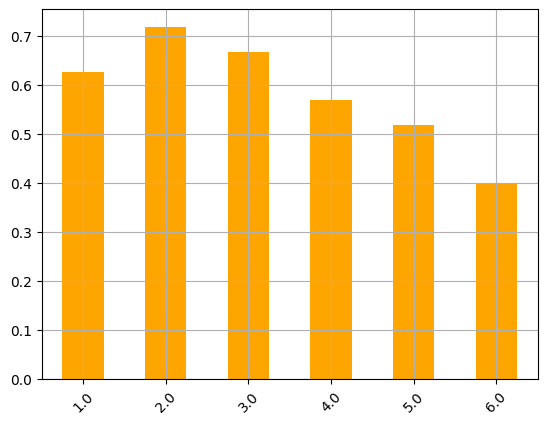

In [ ]:
# 통계분석 --> 교육수준의 단계별 당뇨병의 유병률 계산 및 시각화
# 당뇨병 환자의 연령 단계별 인구수
cond = df_diabetes.loc[:,names[0]]==1
diabetes_edu_counts = df_diabetes.loc[cond,names[-2]].value_counts().sort_index()
print(f'당뇨병 환자 중 연령 단계별 인구수:\n{diabetes_edu_counts}\n')

# 연령 단계별 인구수 대비 당뇨병 환자 비율(유병률)
ratio = diabetes_edu_counts / edu_counts
print(f'연령 단계별 인구수 대비 당뇨병 환자 유병률 : \n{ratio}\n')

# 유병률에 대한 시각화 --> Series 자료형 시각화
ratio.plot(kind='bar',grid=True,rot=45,color='orange')
plt.show()

###■ 당뇨병과 연간가구소득의 관계 분석

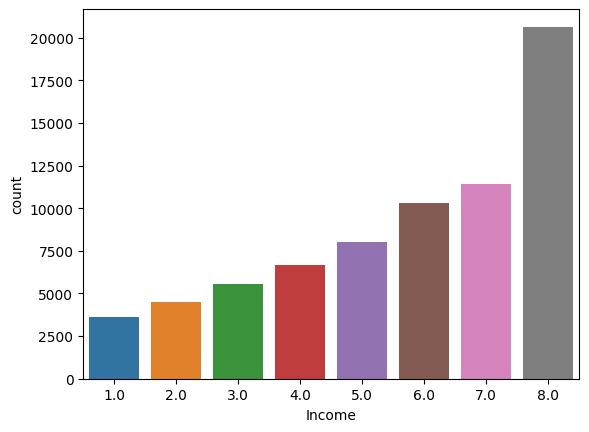

연간 가구소득 단계별 인구수 :
1.0     3611
2.0     4498
3.0     5557
4.0     6658
5.0     8010
6.0    10287
7.0    11425
8.0    20646
Name: Income, dtype: int64



In [ ]:
# 연간 가구소득 컬럼의 분포 시각화
sns.countplot(data=df_diabetes,x=names[-1])
plt.show()

# 통계추출 --> 연간 가구소득 단계별 인구수 추출
income_counts = df_diabetes.loc[:,names[-1]].value_counts().sort_index()
print(f'연간 가구소득 단계별 인구수 :\n{income_counts}\n')

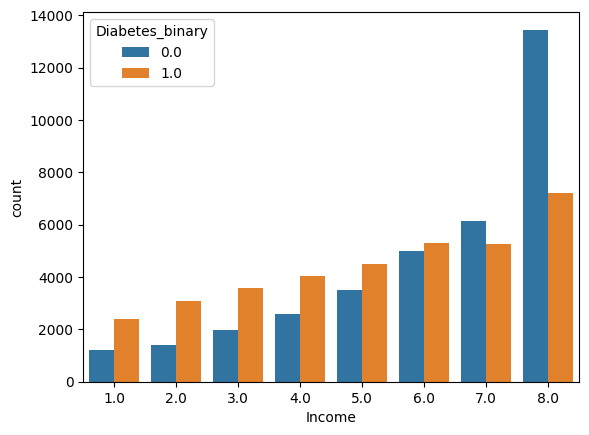

In [ ]:
# 당뇨병과 연간소득 컬럼의 관계 확인
sns.countplot(data=df_diabetes,x=names[-1],hue=names[0])
plt.show()

당뇨병 환자 중 가구소득 단계별 인구수:
1.0    2383
2.0    3086
3.0    3568
4.0    4054
5.0    4504
6.0    5291
7.0    5265
8.0    7195
Name: Income, dtype: int64

가구소득 단계별 인구수 대비 당뇨병 환자 유병률 : 
1.0    0.659928
2.0    0.686083
3.0    0.642073
4.0    0.608892
5.0    0.562297
6.0    0.514338
7.0    0.460832
8.0    0.348494
Name: Income, dtype: float64



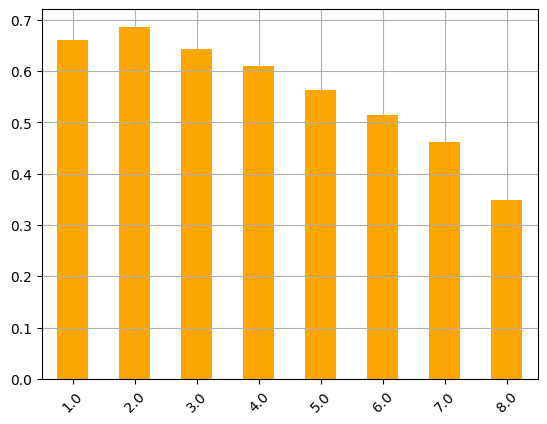

In [ ]:
# 통계분석 --> 가구소득의 단계별 당뇨병의 유병률 계산 및 시각화

# 당뇨병 환자의 가구소득 단계별 인구수
cond = df_diabetes.loc[:,names[0]]==1
diabetes_income_counts = df_diabetes.loc[cond,names[-1]].value_counts().sort_index()
print(f'당뇨병 환자 중 가구소득 단계별 인구수:\n{diabetes_income_counts}\n')

# 가구소득 단계별 인구수 대비 당뇨병 환자 비율(유병률)
ratio = diabetes_income_counts / income_counts
print(f'가구소득 단계별 인구수 대비 당뇨병 환자 유병률 : \n{ratio}\n')

# 유병률에 대한 시각화 --> Series 자료형 시각화
ratio.plot(kind='bar',grid=True,rot=45,color='orange')
plt.show()

##§ 모델링

###■ 학습용 데이터와 평가용 데이터 생성

In [ ]:
# 전체 데이터 --> 학습용:평가용=80:20으로 분할

# 필요한 함수 임포트
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

X_data = df_diabetes.iloc[:,1:]
# X_data = df_diabetes.iloc[:,1:]
y_data = df_diabetes.loc[:,'Diabetes_binary']
# y_data = df_diabetes.loc[:,names[0]]
# print(X_data)
# print(y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=0,stratify=y_data)


In [ ]:
# 학습용 데이터 확인
print(f'X_train의 모양 : {X_train.shape}')
print(f'X_train의 index : {X_train.index}')
print(f'y_train의 모양 : {y_train.shape}')
print(f'y_train의 index : {y_train.index}')
print(f'y_train의 정답분포 :\n{y_train.value_counts()}')

X_train의 모양 : (56553, 21)
X_train의 index : Int64Index([35369, 40967, 27238, 50582, 38854, 49562, 23991, 13093, 25789,
            45889,
            ...
            23615,  6543, 38363, 45899, 65393, 22335,  7166, 66883, 36604,
            27209],
           dtype='int64', length=56553)
y_train의 모양 : (56553,)
y_train의 index : Int64Index([35369, 40967, 27238, 50582, 38854, 49562, 23991, 13093, 25789,
            45889,
            ...
            23615,  6543, 38363, 45899, 65393, 22335,  7166, 66883, 36604,
            27209],
           dtype='int64', length=56553)
y_train의 정답분포 :
1.0    28277
0.0    28276
Name: Diabetes_binary, dtype: int64


###■ DecisionTree모델을 이용한 분류

####→ 모델 생성

In [ ]:
# DecisionTree모델을 이용한 분류
dt = DecisionTreeClassifier(random_state=0)

####→ 모델 학습

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

####→ 모델학습시 생성된 트리구조 시각화

In [ ]:
# 학습된 모델의 깊이 확인
depth = dt.get_depth()
print(f'학습된 모델의 최대 깊이 : {depth}')

학습된 모델의 최대 깊이 : 37


[Text(0.5, 0.9, 'HighBP <= 0.5\ngini = 0.5\nsamples = 56553\nvalue = [28276, 28277]'),
 Text(0.25, 0.7, 'GenHlth <= 2.5\ngini = 0.406\nsamples = 24637\nvalue = [17655, 6982]'),
 Text(0.125, 0.5, 'Age <= 9.5\ngini = 0.248\nsamples = 13812\nvalue = [11812, 2000]'),
 Text(0.0625, 0.3, 'BMI <= 28.5\ngini = 0.185\nsamples = 10346\nvalue = [9278, 1068]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'BMI <= 27.5\ngini = 0.393\nsamples = 3466\nvalue = [2534, 932]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Age <= 4.5\ngini = 0.497\nsamples = 10825\nvalue = [5843, 4982]'),
 Text(0.3125, 0.3, 'GenHlth <= 3.5\ngini = 0.339\nsamples = 1693\nvalue = [1327, 366]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'BMI <= 27.5\ngini = 0.5\nsamples = 9132\nvalue = [4516, 4616]'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.46875, 0.1, '\n  (...)  \n')

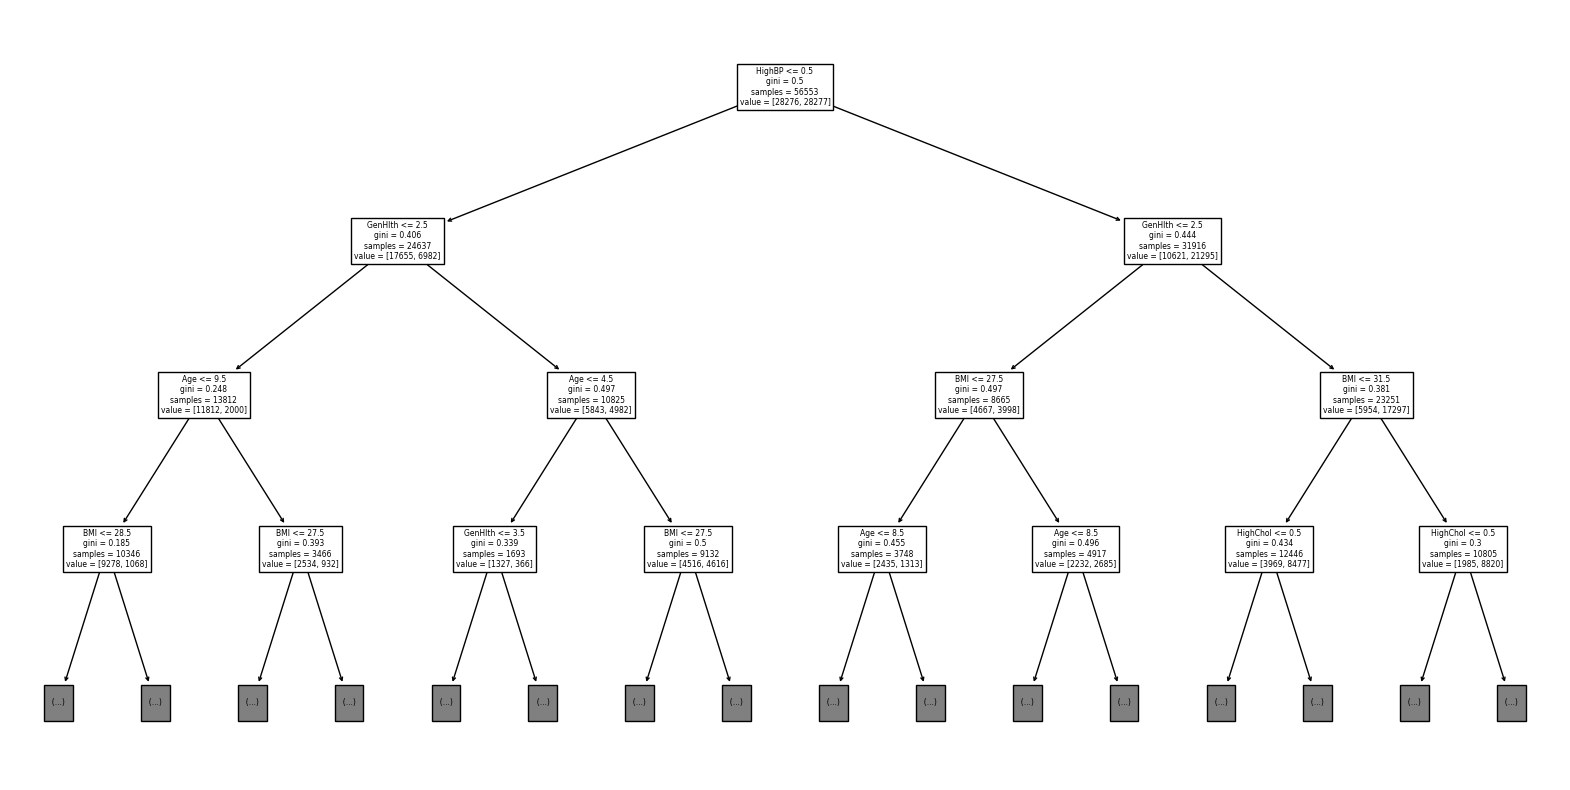

In [ ]:
# 이미지 크기 재설정
plt.figure(figsize=(20,10))

# 트리구조 시각화
plot_tree(dt,max_depth=3,feature_names=X_train.columns)

####→ 학습용 데이터와 평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터를 이용한 예측
pred_train = dt.predict(X_train)
print(pred_train)

[1. 1. 0. ... 1. 1. 0.]


In [ ]:
# 평가용 데이터를 이용한 예측
pred_test = dt.predict(X_test)

####→ 모델평가

In [ ]:
# 학습용 데이터에 대한 정확도 평가
accuracy_train = accuracy_score(y_train,pred_train)

# 평가용 데이터에 대한 정확도 평가
accuracy_test = accuracy_score(y_test, pred_test)

# 결과 확인
print(f'학습용 데이터에 대한 정확도 : {accuracy_train}\n')
print(f'평가용 데이터에 대한 정확도 : {accuracy_test}\n')

학습용 데이터에 대한 정확도 : 0.995190352412781

평가용 데이터에 대한 정확도 : 0.654501732795813



####→ 모델 최적화(Optimise)

#####: 컬럼 첨삭

In [ ]:
# 컬럼을 빼고 해보기
X_data = df_diabetes.drop(columns=[names[0],names[3]])

#####: GridSearchCV를 이용

######ㄴ 모델생성

In [ ]:
# 최적화할 기본 모델 생성
base_dt = DecisionTreeClassifier()

# 튜닝할 매개변수 설정 --> python dict 자료형
params = {'max_depth':[3,4,5,6,7,8,9],'random_state':[0,72,4200]}

# GridSearchCV() 함수 --> 테스트 모델 생성
grid_dt = GridSearchCV(estimator=base_dt,param_grid=params,cv=10,scoring='accuracy')

# 테스트 모델 학습 및 평가
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'random_state': [0, 72, 4200]},
             scoring='accuracy')

In [ ]:
# 최적의 성능을 나타내는 하이퍼파라미터 조합 확인
grid_dt.best_params_

{'max_depth': 7, 'random_state': 0}

In [ ]:
# best model 생성
best_dt = DecisionTreeClassifier(random_state=0, max_depth=7)

######ㄴ 모델학습

In [ ]:
# 모델 학습
best_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

######ㄴ 학습용/평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터를 이용한 예측
pred_train = best_dt.predict(X_train)
# 평가용 데이터를 이용한 예측
pred_test = best_dt.predict(X_test)

######ㄴ 모델평가

In [ ]:
# 학습용 데이터에 대한 정확도 평가
accuracy_train = accuracy_score(y_train,pred_train)
# 평가용 데이터에 대한 정확도 평가
accuracy_test = accuracy_score(y_test,pred_test)

# 결과 확인하기
print(f'학습용 데이터에 대한 정확도 : {accuracy_train}\n')
print(f'평가용 데이터에 대한 정확도 : {accuracy_test}\n')

학습용 데이터에 대한 정확도 : 0.7479886124520362

평가용 데이터에 대한 정확도 : 0.7412122498055025



######ㄴ 결과 시각화

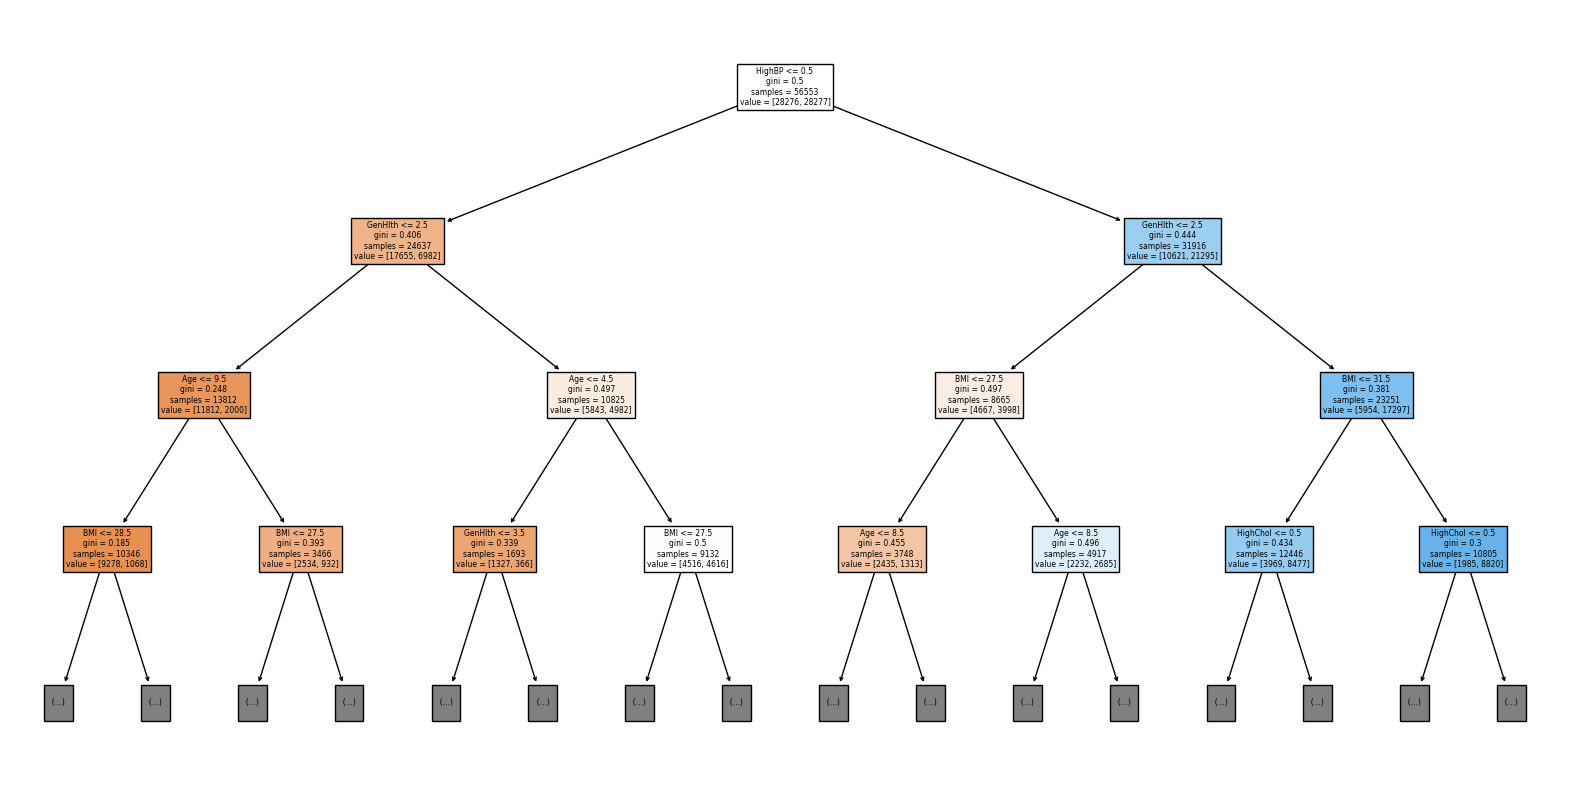

In [ ]:
# 이미지 크기 재설정
plt.figure(figsize=(20,10))

# 트리 구조 시각화
plot_tree(best_dt,max_depth=3,filled=True,feature_names=X_train.columns)
plt.show()

####→ feature importance 추출 및 시각화

[4.54038040e-01 4.32882340e-02 1.31434807e-03 1.00364271e-01
 3.61227924e-04 4.80397893e-04 6.62465554e-03 1.09793314e-03
 0.00000000e+00 0.00000000e+00 8.23112238e-03 0.00000000e+00
 3.23160924e-04 2.84196920e-01 8.39970657e-04 1.77499129e-03
 2.04679760e-03 7.80445353e-04 8.95776945e-02 6.11898905e-04
 4.04789088e-03]
HighBP                  0.454038
GenHlth                 0.284197
BMI                     0.100364
Age                     0.089578
HighChol                0.043288
HvyAlcoholConsump       0.008231
HeartDiseaseorAttack    0.006625
Income                  0.004048
DiffWalk                0.002047
PhysHlth                0.001775
CholCheck               0.001314
PhysActivity            0.001098
MentHlth                0.000840
Sex                     0.000780
Education               0.000612
Stroke                  0.000480
Smoker                  0.000361
NoDocbcCost             0.000323
Fruits                  0.000000
Veggies                 0.000000
AnyHealthcare     

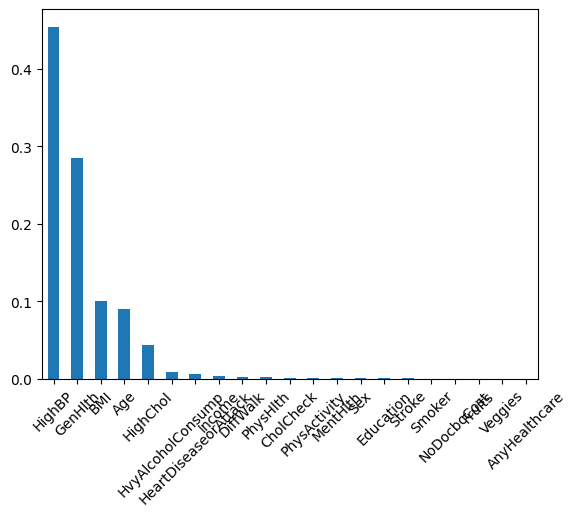

In [ ]:
# feature_importances_ 추출
importances = best_dt.feature_importances_
print(importances)

# Series 생성
s_importances = pd.Series(data=importances,index=X_train.columns).sort_values(ascending=False)
print(s_importances)
# 시각화
s_importances.plot(kind='bar',rot=45)
plt.show()

###■ RandomForest 모델을 이용한 분류

####→ 모델생성

In [ ]:
# 모델 생성함수 임포트
# 모델생성함수 호출, 모델 생성
rf = RandomForestClassifier(random_state=0)

####→ 모델학습

In [ ]:
# 학습
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

####→ 학습용/평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터를 이용한 예측
pred_train = rf.predict(X_train)
# 평가용 데이터를 이용한 예측
pred_test = rf.predict(X_test)

####→ 모델평가

In [ ]:
# 모델평가를 위한 함수 임포트
# 학습용 데이터에 대한 정확도 평가
accuracy_train = accuracy_score(y_train,pred_train)
# 평가용 데이터에 대한 정확도 평가
accuracy_test = accuracy_score(y_test,pred_test)

# 결과 확인
print(f'학습용 데이터에 대한 정확도 : {accuracy_train}\n')
print(f'평가용 데이터에 대한 정확도 : {accuracy_test}\n')

학습용 데이터에 대한 정확도 : 0.9951373048290983

평가용 데이터에 대한 정확도 : 0.7402220807695028



####→ GridSearchCV를 이용한 모델 최적화

#####: 모델생성

In [ ]:
# GridSearchCV 실행
# 필요한 함수 임포트
# 최적화할 기본모델 생성
base_rf = RandomForestClassifier(random_state=0)

# 튜닝할 매개변수 설정
params = {'n_estimators':[100,200,300],'max_depth':[5,6,7,8,9]}
grid_rf = GridSearchCV(estimator=base_rf,param_grid=params,cv=10,scoring='accuracy')

# 학습 및 평가
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# 최적의 성능을 나타내는 하이퍼파라미터 조합 확인
grid_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [ ]:
# best model 생성
best_rf = RandomForestClassifier(max_depth=9,n_estimators=200,random_state=0)

#####: 모델학습

In [ ]:
# 학습
best_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=0)

#####: 학습용/평가용 데이터에 대한 예측

In [ ]:
# 학습용 데이터에 대한 예측
pred_train = best_rf.predict(X_train)
# 평가용 데이터에 대한 예측
pred_test = best_rf.predict(X_test)

#####: 모델 평가

In [ ]:
# 학습용 데이터에 대한 평가
accuracy_train = accuracy_score(y_train,pred_train)
# 평가용 데이터에 대한 평가
accuracy_test = accuracy_score(y_test,pred_test)

# 결과확인
print(f'학습용 데이터에 대한 정확도 : {accuracy_train}\n')
print(f'평가용 데이터에 대한 정확도 : {accuracy_test}\n')

학습용 데이터에 대한 정확도 : 0.7643095856983715

평가용 데이터에 대한 정확도 : 0.7508310347266426



####→ feature importance 추출 및 시각화

[0.21275529 0.10505704 0.0081941  0.13101115 0.00313406 0.00473057
 0.03181186 0.00601443 0.0024002  0.00257462 0.00851348 0.0020471
 0.00226952 0.23584656 0.00821667 0.02568079 0.06383601 0.00689599
 0.097107   0.01279119 0.02911238]
GenHlth                 0.235847
HighBP                  0.212755
BMI                     0.131011
HighChol                0.105057
Age                     0.097107
DiffWalk                0.063836
HeartDiseaseorAttack    0.031812
Income                  0.029112
PhysHlth                0.025681
Education               0.012791
HvyAlcoholConsump       0.008513
MentHlth                0.008217
CholCheck               0.008194
Sex                     0.006896
PhysActivity            0.006014
Stroke                  0.004731
Smoker                  0.003134
Veggies                 0.002575
Fruits                  0.002400
NoDocbcCost             0.002270
AnyHealthcare           0.002047
dtype: float64


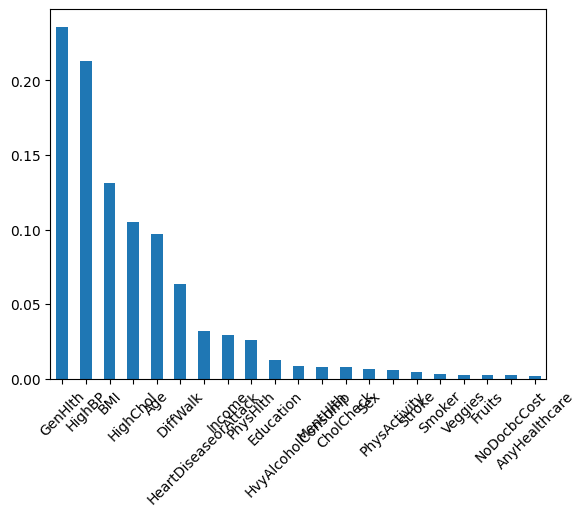

In [ ]:
# feature_importances_ 추출
importances = best_rf.feature_importances_
print(importances)

# Series 생성
s_importances = pd.Series(data=importances,index=X_train.columns).sort_values(ascending=False)
print(s_importances)
# 시각화
s_importances.plot(kind='bar',rot=45)
plt.show()

###■ XGBoost 모델을 이용한 분류

####→ 모델생성

In [ ]:
# GridSearchCV 함수 사용
base_xgb = XGBClassifier(random_state=0)

# 튜닝 매개변수 설정
params = {'n_estimators':[50,100,200],
          'learning_rate':[0.05,0.1,0.5],
          'max_depth':[3,4,5]}

# 모델 생성
grid_xgb = GridSearchCV(estimator=base_xgb,
                        param_grid=params,
                        cv=10,
                        scoring='accuracy')

# 학습 및 평가
grid_xgb.fit(X_train,y_train)

# 최적 성능 하이퍼파라미터 확인
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [ ]:
# best model 생성
best_xgb = XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=3,random_state=0)

####→ 모델학습

In [ ]:
# 학습
best_xgb.fit(X_data,y_data)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

####→ 평가용 데이터를 이용한 예측

In [ ]:
# 예측
pred_test = best_xgb.predict(X_test)

####→ 모델평가

In [ ]:
# 평가
print(f'평가용 데이터에 대한 정확도 : {accuracy_score(y_test,pred_test)}\n')

평가용 데이터에 대한 정확도 : 0.7576207652592121



####→ feature importance 추출 및 시각화

[0.5592997  0.08929002 0.02142209 0.03177398 0.00250356 0.00590826
 0.03636729 0.00185538 0.00243523 0.00176704 0.02219422 0.00149649
 0.00180419 0.10752419 0.00287201 0.00240555 0.04567438 0.01153951
 0.03482708 0.00319512 0.01384469]
HighBP                  0.559300
GenHlth                 0.107524
HighChol                0.089290
DiffWalk                0.045674
HeartDiseaseorAttack    0.036367
Age                     0.034827
BMI                     0.031774
HvyAlcoholConsump       0.022194
CholCheck               0.021422
Income                  0.013845
Sex                     0.011540
Stroke                  0.005908
Education               0.003195
MentHlth                0.002872
Smoker                  0.002504
Fruits                  0.002435
PhysHlth                0.002406
PhysActivity            0.001855
NoDocbcCost             0.001804
Veggies                 0.001767
AnyHealthcare           0.001496
dtype: float32


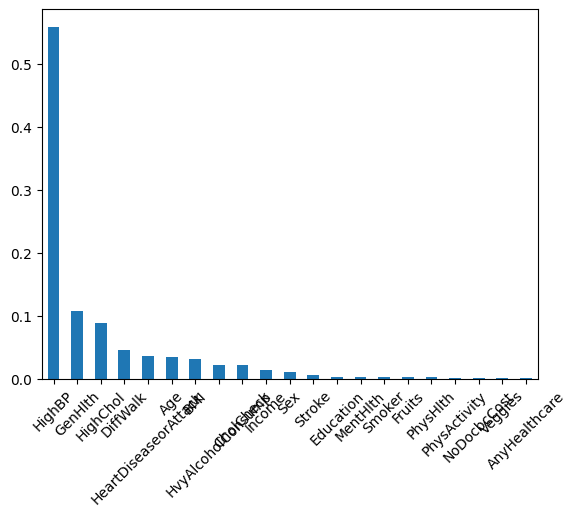

In [ ]:
# feature_importances_ 추출
importances = best_xgb.feature_importances_
print(importances)

# Series 생성
s_importances = pd.Series(data=importances,index=X_train.columns).sort_values(ascending=False)
print(s_importances)
# 시각화
s_importances.plot(kind='bar',rot=45)
plt.show()

###■ LightGBM 모델을 이용한 분류

####→ 모델생성

In [ ]:
# GridSearchCV 함수 사용
base_lgbm = LGBMClassifier(random_state=0)

# 튜닝 매개변수 설정
params = {'n_estimators':[50,100,200,300],
          'learning_rate':[0.05,0.1,0.5],
          'max_depth':[3,4,5]}

# 모델 생성
grid_lgbm = GridSearchCV(estimator=base_lgbm,
                        param_grid=params,
                        cv=10,
                        scoring='accuracy')

# 학습 및 평가
grid_lgbm.fit(X_train,y_train)

# 최적 성능 하이퍼파라미터 확인
grid_lgbm.best_params_

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Info] Start training from score 0.000079
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}

In [ ]:
# best model 생성
from lightgbm import LGBMClassifier
best_lgbm = LGBMClassifier(n_estimators=300,learning_rate=0.05,max_depth=4,random_state=0)

####→ 모델학습

In [ ]:
best_lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 28277, number of negative: 28276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 56553, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000035
[LightGBM] [Info] Start training from score 0.000035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMClassifier(learning_rate=0.05, max_depth=4, n_estimators=300,
               random_state=0)

####→ 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_lgbm.predict(X_test)

####→ 모델평가

In [ ]:
# 평가함수 정의

# 필요한 함수 임포트
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

# 평가함수 정의
def eval_model(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)

    # 각 평가결과 --> 데이터프레임 생성
    data = [[accuracy,f1,precision,recall]]
    columns = ['accuracy','f1_score','precision','recall']
    eval_df = pd.DataFrame(data=data, columns=columns)
    return eval_df

In [ ]:
# 평가용 데이터에 대한 성능 평가
result = eval_model(y_test,pred_test)
# 결과확인
print(f'평가용 데이터에 대한 모델성능 평가결과 :\n{result}')

평가용 데이터에 대한 성능평가 결과 :
   accuracy  f1_score  precision    recall
0  0.755499  0.763785   0.738699  0.790635


In [ ]:
print(f'평가용 데이터에 대한 정확도 = {accuracy_score(y_test,pred_test)}\n')

평가용 데이터에 대한 정확도 = 0.7554989744677841



####→ feature importance 추출 및 시각화

[78866.67709761 15028.47001179  2996.17352262 28911.43141672
   481.49714184   498.72714388  3440.30508924   354.08077616
   319.20656165   127.30211654  2609.23557019   288.81233907
   197.76132035 63059.22672591  1115.66075456  1077.93978757
  3345.3764292   2774.27923617 24894.07241747  1533.29651323
  4130.5956381 ]
HighBP                  78866.677098
HighChol                15028.470012
CholCheck                2996.173523
BMI                     28911.431417
Smoker                    481.497142
Stroke                    498.727144
HeartDiseaseorAttack     3440.305089
PhysActivity              354.080776
Fruits                    319.206562
Veggies                   127.302117
HvyAlcoholConsump        2609.235570
AnyHealthcare             288.812339
NoDocbcCost               197.761320
GenHlth                 63059.226726
MentHlth                 1115.660755
PhysHlth                 1077.939788
DiffWalk                 3345.376429
Sex                      2774.279236
Age         

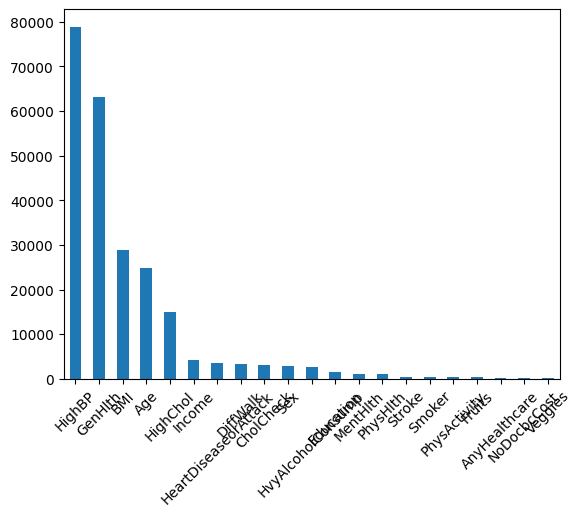

In [ ]:
importances = best_lgbm.booster_.feature_importance(importance_type='gain')
print(importances)
s_importances = pd.Series(data=best_lgbm.booster_.feature_importance(importance_type='gain'),index=X_train.columns)
print(s_importances)
s_importances.sort_values(ascending=False).plot(kind='bar',rot=45)
plt.show()

In [ ]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                70692 non-null  float64
 1   HighChol              70692 non-null  float64
 2   BMI                   70692 non-null  float64
 3   Smoker                70692 non-null  float64
 4   Stroke                70692 non-null  float64
 5   HeartDiseaseorAttack  70692 non-null  float64
 6   PhysActivity          70692 non-null  float64
 7   Fruits                70692 non-null  float64
 8   Veggies               70692 non-null  float64
 9   HvyAlcoholConsump     70692 non-null  float64
 10  AnyHealthcare         70692 non-null  float64
 11  NoDocbcCost           70692 non-null  float64
 12  GenHlth               70692 non-null  float64
 13  MentHlth              70692 non-null  float64
 14  PhysHlth              70692 non-null  float64
 15  DiffWalk           

###■ Logistic Regression 모델을 이용한 분류

####→ 모델생성
[공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# GridSearchCV 함수 실행
# 필요한 함수 임포트
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# 최적화할 기본 model 생성함수 호출, 모델 생성
base_lgr = LogisticRegression(random_state=0)

# 튜닝할 매개변수 설정
num = np.arange(0.1,3.1,0.1)
params = {'C':num, 'max_iter':[5000,10000,15000]}

# GridSearchCV 함수 실행
grid_lgr = GridSearchCV(estimator=base_lgr,
                        param_grid=params,
                        scoring='accuracy',
                        cv=10)

# 학습 및 평가
grid_lgr.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. ]),
                         'max_iter': [5000, 10000, 15000]},
             scoring='accuracy')

In [ ]:
# 최적의 하이퍼파라미터 확인
print(grid_lgr.best_params_)

{'C': 1.3000000000000003, 'max_iter': 5000}


In [ ]:
# best model 생성
best_lgr = LogisticRegression(C=1.3,max_iter=5000,random_state=0)

####→ 모델학습

In [ ]:
best_lgr.fit(X_train,y_train)

LogisticRegression(C=1.3, max_iter=5000, random_state=0)

####→ 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_lgr.predict(X_test)
print(pred_test)

[1. 1. 1. ... 1. 0. 1.]


####→ 모델평가

In [ ]:
# 평가함수 정의

# 필요한 함수 임포트
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

# 평가함수 정의
def eval_model(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)

    # 각 평가결과 --> 데이터프레임 생성
    data = [[accuracy,f1,precision,recall]]
    columns = ['accuracy','f1_score','precision','recall']
    eval_df = pd.DataFrame(data=data, columns=columns)
    return eval_df

In [ ]:
# 평가용 데이터에 대한 성능 평가
result = eval_model(y_test,pred_test)
# 결과확인
print(f'평가용 데이터에 대한 성능평가 결과 :\n{result}')

평가용 데이터에 대한 성능평가 결과 :
   accuracy  f1_score  precision    recall
0  0.748426  0.751276    0.74281  0.759938
